In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.model_selection import train_test_split
from sklearn import metrics

<h2 id="Data_Import">1. Data Import</h2>

In [2]:
data = pd.read_csv('Cust_Segmentation.csv')

<h2 id="Data_Understanding">2. Data Understanding and Manipulation</h2>


<h4>Show data header</h4>

In [3]:
data.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h4>Check to number of rows and columns</h4>

In [4]:
print("the number of (rows, columns) is:",data.shape)

the number of (rows, columns) is: (850, 10)


<h4>Show columns names</h4>


In [5]:
print(data.columns)

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')


<h4>Drop the irrelevant columns: "Customer Id" and "Adress"</h4>

In [6]:
data.drop(['Customer Id','Address'], axis =1 , inplace = True) 

In [7]:
data.head(15)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
5,40,1,23,81,0.998,7.831,NaN,10.9
6,38,2,4,56,0.442,0.454,0.0,1.6
7,42,3,0,64,0.279,3.945,0.0,6.6
8,26,1,5,18,0.575,2.215,NaN,15.5
9,47,3,23,115,0.653,3.947,0.0,4.0


<h4>Data information</h4>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          700 non-null float64
DebtIncomeRatio    850 non-null float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


<h2 id="Data_Processing">3. Data Processing</h2>

<h3> Dealing with missing data</h3>

In [9]:
#Count missing values in each column
print(data.isnull().sum())

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


In "Defaulted" column there are 150 missing values

In [10]:
# calculate the average of the "Defaulted" columns
avg_Defaulted = data["Defaulted"].mean(axis=0)
print("Average of Defaulted:", avg_Defaulted)


Average of Defaulted: 0.26142857142857145


In [11]:
# replace "NaN" by mean value
data["Defaulted"].replace(np.nan, avg_Defaulted, inplace=True)

In [12]:
# check it
print(data["Defaulted"].isnull().sum())

0


<h2 id="EDA">4. Data Visualization and Analysis</h2>

<h3>4.1 Data Visualization</h3>

<h4>Heatmap</h4>

In [13]:
data.corr()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Age,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.124221,0.008240
Edu,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.104101,0.008053
Years Employed,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.252226,-0.033625
Income,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.061507,-0.035585
Card Debt,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.221161,0.514971
Other Debt,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.127891,0.572545
Defaulted,-0.124221,0.104101,-0.252226,-0.061507,0.221161,0.127891,1.000000,0.359159
DebtIncomeRatio,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.359159,1.000000


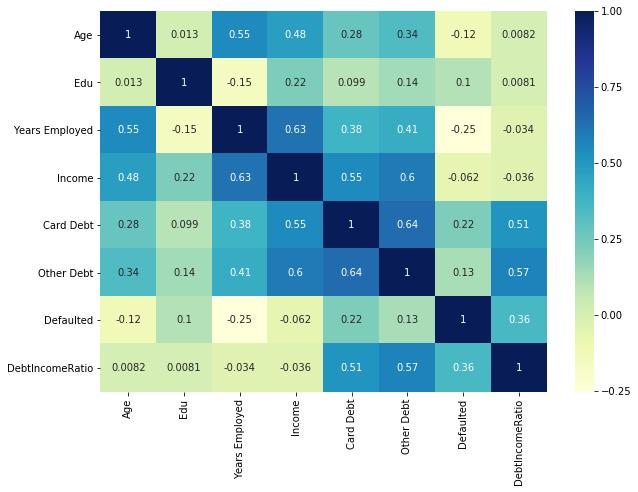

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu");

<h4>Pairplot</h4>

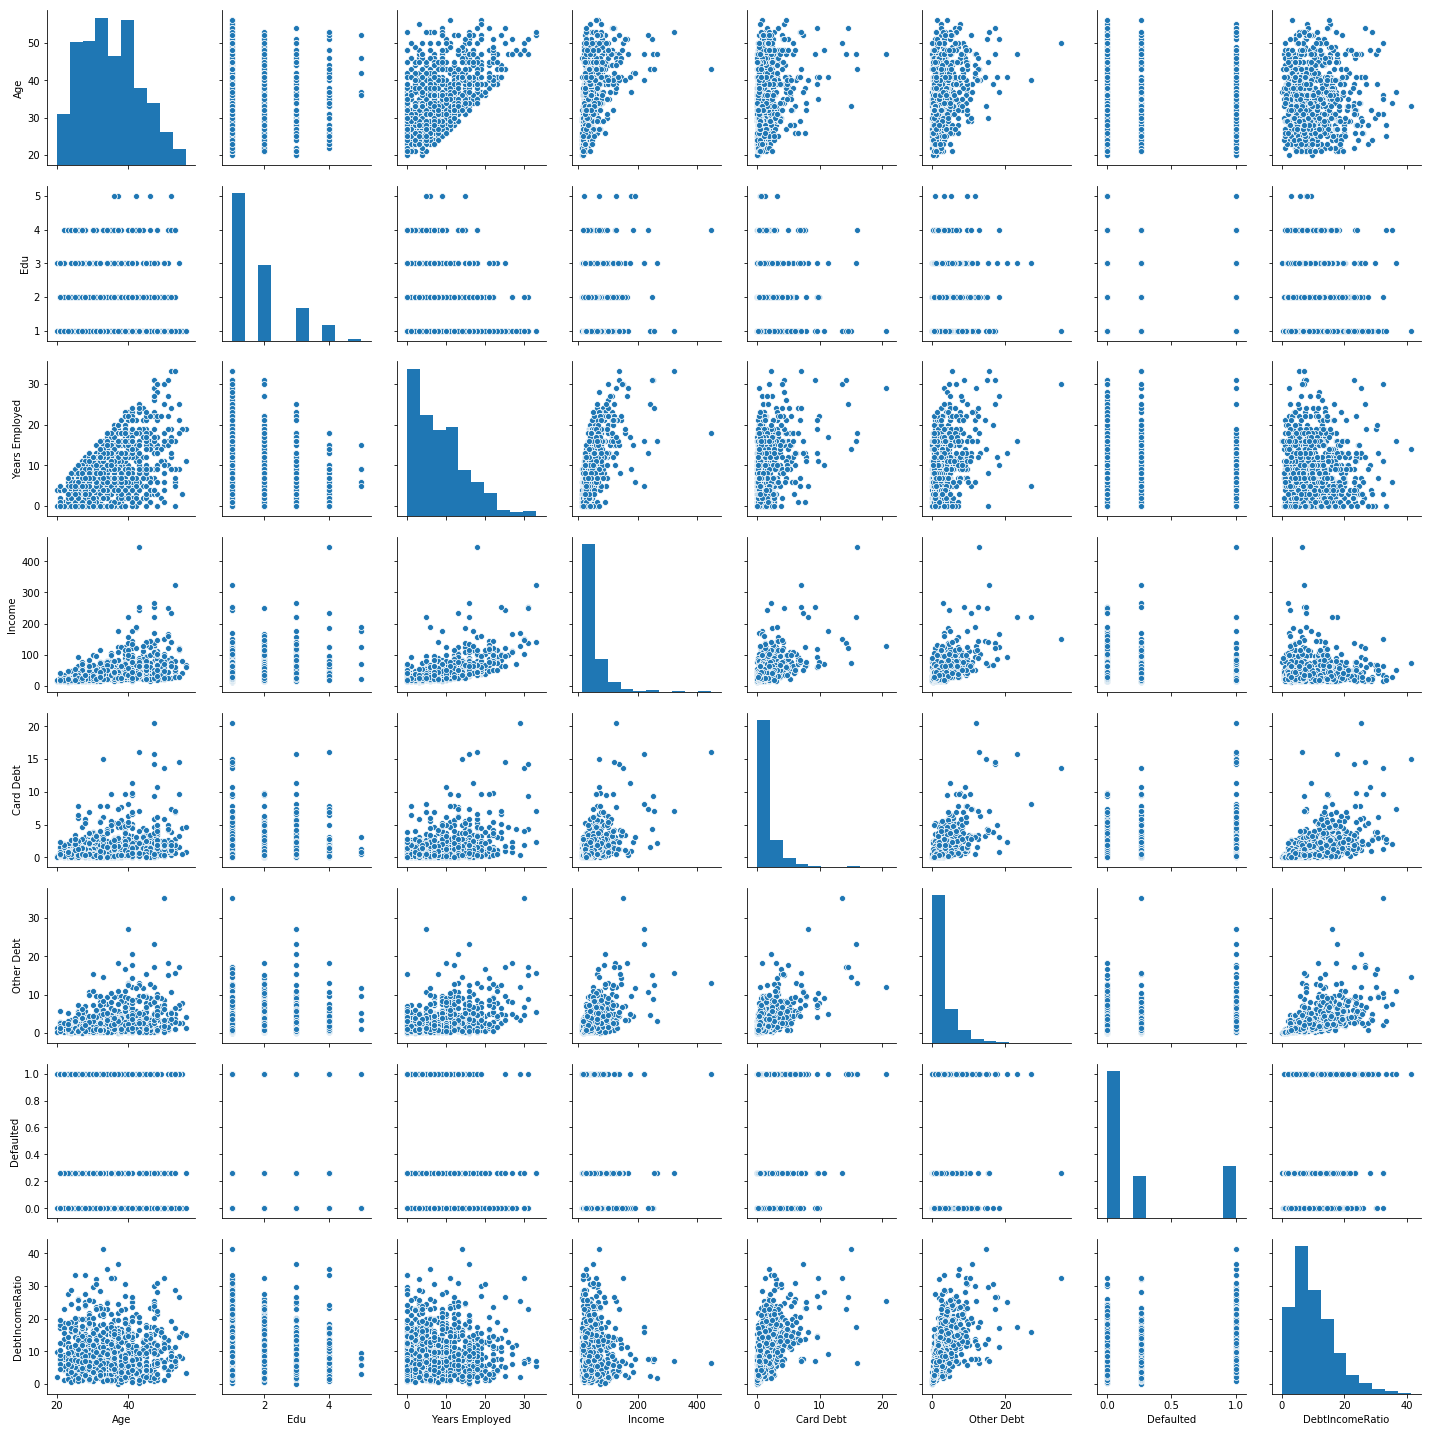

In [15]:
import matplotlib.pyplot as plt
sns.pairplot(data)

<h4>Boxplot</h4>

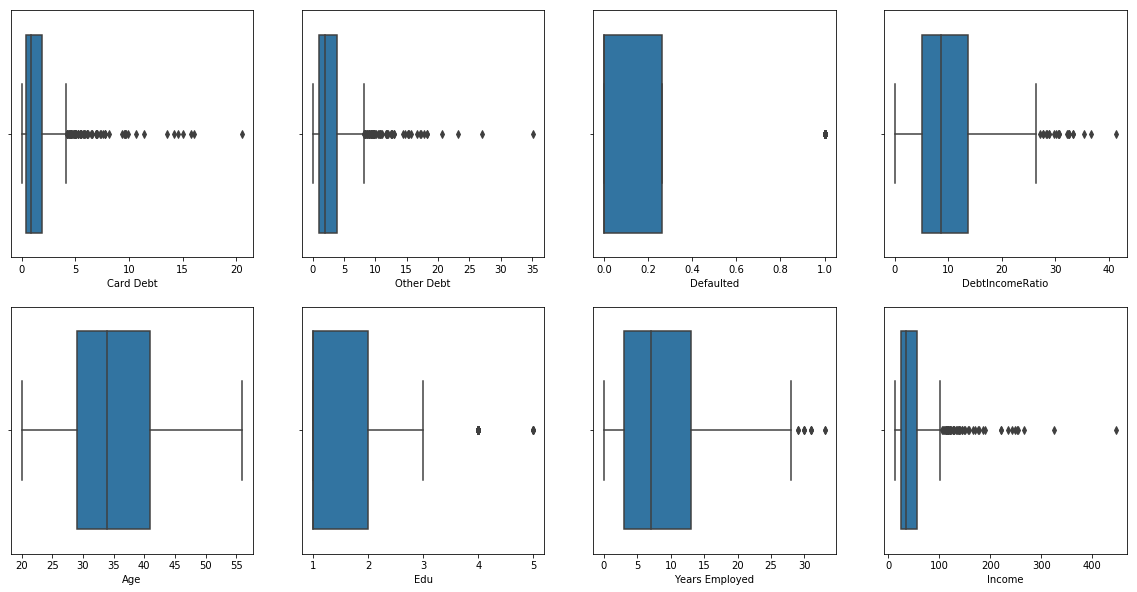

In [16]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
sns.boxplot( data["Card Debt"], ax=axes[0, 0])
sns.boxplot( data["Other Debt"] , ax=axes[0, 1])
sns.boxplot( data["Defaulted"] , ax=axes[0, 2])
sns.boxplot( data["DebtIncomeRatio"] , ax=axes[0, 3])
sns.boxplot( data["Age"] , ax=axes[1, 0])
sns.boxplot( data["Edu"] , ax=axes[1, 1])
sns.boxplot( data["Years Employed"] , ax=axes[1, 2])
sns.boxplot( data["Income"] , ax=axes[1, 3])

<h4>Distribution plot</h4>

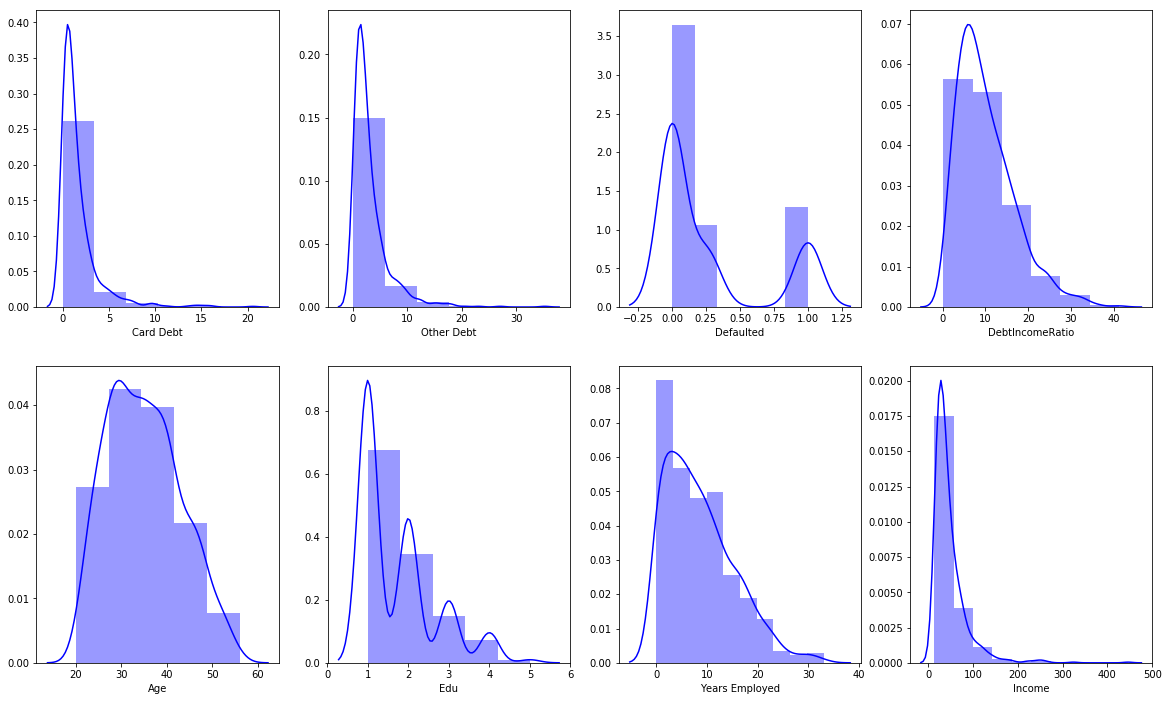

In [17]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
sns.distplot( data["Card Debt"] , bins=6,color="blue", ax=axes[0, 0])
sns.distplot( data["Other Debt"] , bins=6,color="blue", ax=axes[0, 1])
sns.distplot( data["Defaulted"] , bins=6,color="blue", ax=axes[0, 2])
sns.distplot( data["DebtIncomeRatio"] , bins=6,color="blue", ax=axes[0, 3])
sns.distplot( data["Age"] , bins=5,color="blue", ax=axes[1, 0])
sns.distplot( data["Edu"] , bins=5,color="blue", ax=axes[1, 1])
sns.distplot( data["Years Employed"] , bins=10,color="blue", ax=axes[1, 2])
sns.distplot( data["Income"] , bins=10,color="blue", ax=axes[1, 3])


<h4>Countplot</h4>

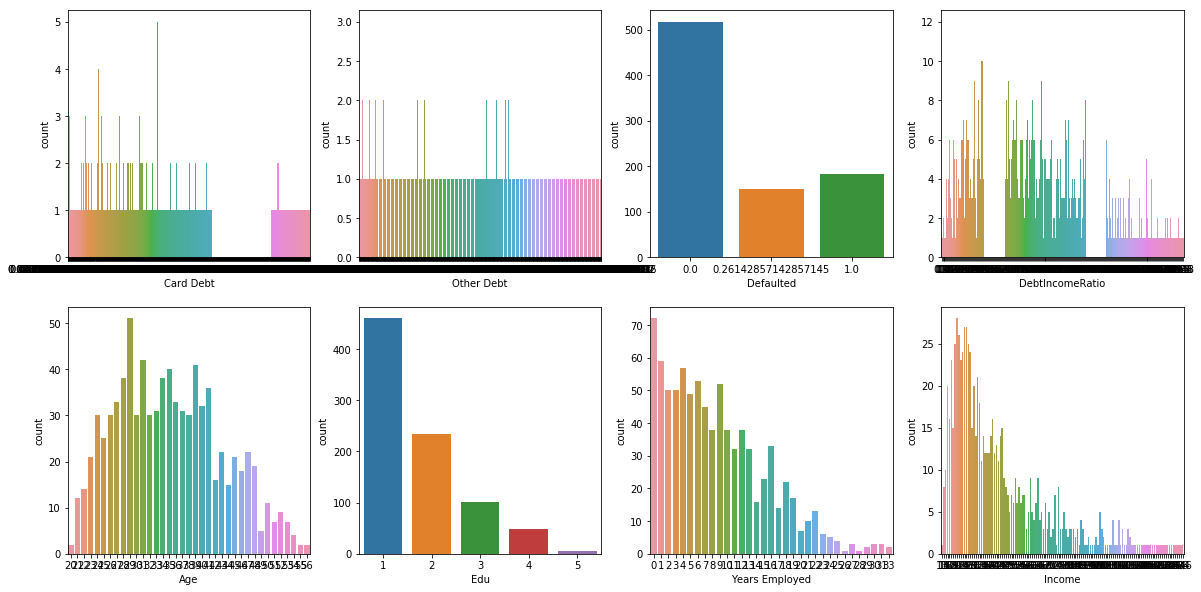

In [18]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
sns.countplot( data["Card Debt"] , ax=axes[0, 0])
sns.countplot( data["Other Debt"] , ax=axes[0, 1])
sns.countplot( data["Defaulted"] , ax=axes[0, 2])
sns.countplot( data["DebtIncomeRatio"] , ax=axes[0, 3])
sns.countplot( data["Age"] , ax=axes[1, 0])
sns.countplot( data["Edu"] , ax=axes[1, 1])
sns.countplot( data["Years Employed"] , ax=axes[1, 2])
sns.countplot( data["Income"] , ax=axes[1, 3])

<h4>Histogram</h4>

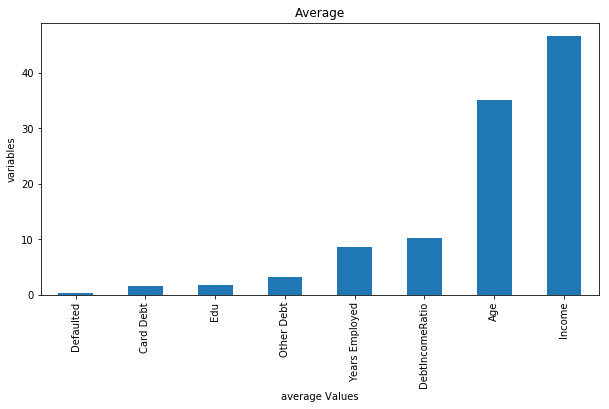

In [19]:
fig = plt.figure(figsize=(10, 5))
data.mean().sort_values().plot(kind='bar')
plt.title('Average')
plt.xlabel("average Values")
plt.ylabel('variables')
plt.show()

<h3>4.2 Analysis</h3>


***1. Pairplot***

<ul>
    <li>The pairplot shows several outliers for the majority of feature-feature plots.</li>
    <li>In general, the variables "Edu" and "Defaulted" have no correlation with all the other features.</li>
    <li>A low linear positive correlation between some feature-feature pairs such as: "Years Employed-Income", "Income-Other debt" and "Card Debt-Other Debt".</li>
    <li>Several plots shows a large number of data points near zero, particularly for the "Card Debt" and "Other Debt". This may be due to the fact that there are large outliers in the dataset.</li>
    
    
</ul>

***2. Heatmap***

We suppose that the pairs of  features with correlation score larger than -/+ 0.5 have a good correlation.

The list of the strong correlated features is:
<ul>
    <li>Age and Years Employed</li>
    <li>Years Employed and Income</li>
    <li>Income and Other Debt</li>
    <li>Income and Card Debt</li>
    <li>Card Debt and DebtIncomeRation</li>
    <li>Card Debt and Other Debt</li>
</ul>

***3. Boxplot***
<ul>
    <li>The variable Age has no outliers</li>
    <li>The variables Edu, Defaulted and Years Employed have a few outliers</li>
    <li>The remainder of the variables have multiple outliers</li>
    

***We will check all the values of outliers and their type (multivariate and univariate):***

In [20]:
from collections import Counter, defaultdict
outliers_all = []
outliers_index = [] # storing array for observations indexes that qualify as outliers
dict_outliers = {}

In [21]:
for feature in data:
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature].values, 25)
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature].values, 75)
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers_df = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    display(outliers_df)
    # Gather the indexes of all the outliers
    features_outliers = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    outliers_all.extend(list(features_outliers.index.values))

Data points considered outliers for the feature 'Age':


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio


Data points considered outliers for the feature 'Edu':


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
17,43,4,1,26,1.519,1.237,0.000000,10.6
24,37,4,10,123,3.022,18.257,0.000000,17.3
43,37,5,9,177,0.888,9.555,0.000000,5.9
71,40,4,5,75,0.885,0.540,0.000000,1.9
86,22,4,0,25,1.491,1.559,0.261429,12.2
89,23,4,0,32,0.818,5.070,1.000000,18.4
101,38,4,13,126,7.613,9.649,0.261429,13.7
111,25,4,0,32,2.140,3.492,0.000000,17.6
122,33,4,9,32,0.496,1.264,0.000000,5.5
135,35,4,4,29,1.844,1.346,0.000000,11.0


Data points considered outliers for the feature 'Years Employed':


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
4,47,1,31,253,9.308,8.908,0.000000,7.2
183,47,1,29,129,20.561,12.076,1.000000,25.3
245,47,1,29,169,0.349,3.369,0.261429,2.2
281,50,1,30,150,13.553,35.197,0.261429,32.5
350,47,1,31,136,14.231,17.185,1.000000,23.1
443,51,2,31,249,4.273,15.149,0.000000,7.8
725,48,2,30,148,3.975,6.681,0.000000,7.2
734,52,1,33,139,2.288,5.496,0.261429,5.6
791,53,1,33,324,7.053,15.627,0.261429,7.0
801,48,1,30,101,1.875,4.589,0.000000,6.4


Data points considered outliers for the feature 'Income':


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
4,47,1,31,253,9.308,8.908,0.000000,7.2
9,47,3,23,115,0.653,3.947,0.000000,4.0
24,37,4,10,123,3.022,18.257,0.000000,17.3
39,39,3,16,126,1.405,7.163,0.261429,6.8
41,48,3,17,113,3.376,10.184,0.000000,12.0
43,37,5,9,177,0.888,9.555,0.000000,5.9
78,41,2,21,145,3.237,14.453,0.000000,12.2
82,40,3,18,157,3.326,7.036,0.000000,6.6
101,38,4,13,126,7.613,9.649,0.261429,13.7
156,39,1,22,113,0.987,1.951,0.000000,2.6


Data points considered outliers for the feature 'Card Debt':


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
1,47,1,26,100,4.582,8.218,0.000000,12.8
2,33,2,10,57,6.111,5.802,1.000000,20.9
4,47,1,31,253,9.308,8.908,0.000000,7.2
22,28,3,6,47,5.574,3.732,1.000000,19.8
62,36,1,18,67,5.245,2.259,0.000000,11.2
63,44,2,18,74,4.522,5.394,0.000000,13.4
101,38,4,13,126,7.613,9.649,0.261429,13.7
118,32,2,12,63,5.550,5.916,0.000000,18.2
144,34,1,12,68,7.817,9.251,1.000000,25.1
155,35,1,16,37,4.213,2.151,0.261429,17.2


Data points considered outliers for the feature 'Other Debt':


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
1,47,1,26,100,4.582,8.218,0.000000,12.8
4,47,1,31,253,9.308,8.908,0.000000,7.2
24,37,4,10,123,3.022,18.257,0.000000,17.3
41,48,3,17,113,3.376,10.184,0.000000,12.0
43,37,5,9,177,0.888,9.555,0.000000,5.9
45,45,3,9,84,1.276,9.728,0.261429,13.1
51,36,1,11,33,1.266,9.459,0.000000,32.5
54,29,3,5,70,3.176,10.754,1.000000,19.9
78,41,2,21,145,3.237,14.453,0.000000,12.2
81,30,3,0,65,3.900,15.405,1.000000,29.7


Data points considered outliers for the feature 'Defaulted':


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
2,33,2,10,57,6.111,5.802,1.0,20.9
10,44,3,8,88,0.285,5.083,1.0,6.1
14,28,3,2,20,0.233,1.647,1.0,9.4
22,28,3,6,47,5.574,3.732,1.0,19.8
32,23,2,0,42,1.019,0.619,1.0,3.9
36,35,3,5,37,0.581,1.417,1.0,5.4
37,37,1,0,18,1.584,0.738,1.0,12.9
40,20,1,4,14,0.201,1.157,1.0,9.7
52,24,1,3,19,1.358,3.278,1.0,24.4
54,29,3,5,70,3.176,10.754,1.0,19.9


Data points considered outliers for the feature 'DebtIncomeRatio':


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
51,36,1,11,33,1.266,9.459,0.000000,32.5
81,30,3,0,65,3.900,15.405,1.000000,29.7
105,47,1,19,50,3.176,11.874,0.000000,30.1
175,53,1,0,27,2.754,5.049,1.000000,28.9
281,50,1,30,150,13.553,35.197,0.261429,32.5
307,31,1,3,16,3.065,2.103,0.261429,32.3
374,32,1,4,16,0.894,3.666,1.000000,28.5
393,31,1,7,41,2.996,9.591,1.000000,30.7
424,48,1,10,70,10.679,9.061,0.261429,28.2
456,23,2,0,17,2.044,2.665,1.000000,27.7


In [22]:
# multivariate feature outliers
outliers_mult = []
outliers_mult = [item for item, count in Counter(outliers_all).items() if count > 1]
outliers_mult


[24,
 43,
 89,
 101,
 209,
 217,
 261,
 298,
 360,
 363,
 367,
 469,
 481,
 532,
 581,
 585,
 642,
 658,
 672,
 719,
 765,
 796,
 823,
 847,
 4,
 183,
 245,
 281,
 350,
 443,
 725,
 734,
 791,
 41,
 78,
 198,
 331,
 384,
 454,
 461,
 502,
 513,
 556,
 571,
 629,
 634,
 652,
 713,
 1,
 2,
 22,
 144,
 205,
 226,
 255,
 293,
 356,
 391,
 421,
 424,
 434,
 450,
 497,
 580,
 593,
 603,
 657,
 715,
 760,
 776,
 784,
 793,
 826,
 51,
 54,
 81,
 105,
 320,
 393,
 520,
 568,
 830,
 175,
 374,
 456,
 479,
 594]

In [23]:
# Univariate feature outliers
outliers_mult = []
outliers_mult = [item for item, count in Counter(outliers_all).items() if count == 1]
outliers_mult

[17,
 71,
 86,
 111,
 122,
 135,
 165,
 169,
 189,
 213,
 223,
 248,
 249,
 334,
 351,
 357,
 408,
 511,
 522,
 552,
 575,
 606,
 607,
 630,
 670,
 685,
 700,
 711,
 744,
 833,
 801,
 9,
 39,
 82,
 156,
 200,
 207,
 221,
 282,
 328,
 368,
 397,
 503,
 540,
 551,
 553,
 646,
 663,
 675,
 717,
 746,
 825,
 62,
 63,
 118,
 155,
 170,
 185,
 232,
 234,
 247,
 267,
 286,
 289,
 337,
 438,
 487,
 519,
 533,
 620,
 645,
 693,
 710,
 740,
 45,
 151,
 238,
 264,
 299,
 344,
 416,
 418,
 470,
 491,
 493,
 550,
 591,
 605,
 696,
 712,
 10,
 14,
 32,
 36,
 37,
 40,
 52,
 55,
 56,
 67,
 69,
 88,
 92,
 93,
 98,
 100,
 103,
 104,
 113,
 139,
 140,
 147,
 152,
 158,
 159,
 173,
 178,
 180,
 184,
 193,
 202,
 215,
 216,
 220,
 229,
 237,
 257,
 263,
 265,
 270,
 275,
 276,
 277,
 296,
 304,
 308,
 317,
 319,
 322,
 326,
 327,
 332,
 335,
 343,
 361,
 370,
 373,
 378,
 402,
 405,
 406,
 413,
 414,
 417,
 427,
 432,
 445,
 451,
 475,
 488,
 489,
 496,
 499,
 500,
 501,
 504,
 507,
 509,
 510,
 512,
 516,

***4. Distribution plot***
<ul>
    <li>Features such "Card Debt", "Other Dept" and "Income" seems to share a similar distribution</li>
    <li>We can see that features as "Years Employed" and "Age" are slightly positively skewed</li>
</ul>    

***4. Distribution plot***
<ul>
    <li>Features such "Card Debt", "Other Dept" and "Income" seems to share a similar distribution</li>
    <li>We can see that features as "Years Employed" and "Age" are slightly positively skewed</li>
</ul> 

<h2 id="Data_Import">5. Model Development: K-mean</h2>

In [24]:
from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(data)
X=data

<h3>5.1 Choosing the best number of clusters</h3>

In [25]:
from sklearn.metrics import silhouette_score
# Apply the clustering algorithm 
for i in range(2,10):
    clusterer = KMeans(n_clusters=i).fit(X)
    # Predict the cluster for each data point
    preds = clusterer.predict(X)
    # Find the cluster centers
    centers = clusterer.cluster_centers_
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X,preds)
    print("The mean silhouette coefficient score for {} clusters is: {:0.3f}".format(i, score))

The mean silhouette coefficient score for 2 clusters is: 0.686
The mean silhouette coefficient score for 3 clusters is: 0.562
The mean silhouette coefficient score for 4 clusters is: 0.472
The mean silhouette coefficient score for 5 clusters is: 0.366
The mean silhouette coefficient score for 6 clusters is: 0.357
The mean silhouette coefficient score for 7 clusters is: 0.337
The mean silhouette coefficient score for 8 clusters is: 0.261
The mean silhouette coefficient score for 9 clusters is: 0.271


- The best score was achieved with 2 clusters, with a score of 0.686 (2 clusters)


<h3>5.2 K-mean implementation</h3>

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 2 </li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

In [26]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [28]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 34.09138381,   1.65926893,   7.45039164,  36.95430809,
          1.29533159,   2.51584987,   0.26760537,  10.24699739],
       [ 43.58333333,   2.17857143,  18.73809524, 135.32142857,
          4.14372619,   8.21209524,   0.20510204,   9.48452381]])

<h3><h3>5.3 Visualization and Analysis</h3>

We assign the labels to each row in dataframe:


In [29]:
data["Cluster"] = k_means_labels
data.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1


We check the centroid values by averaging the features in each cluster:

In [30]:
data.groupby('Cluster').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,
0,34.091384,1.659269,7.450392,36.954308,1.295332,2.515850,0.267605,10.246997
1,43.583333,2.178571,18.738095,135.321429,4.143726,8.212095,0.205102,9.484524


We look at the distribution of customers based on their age and income:

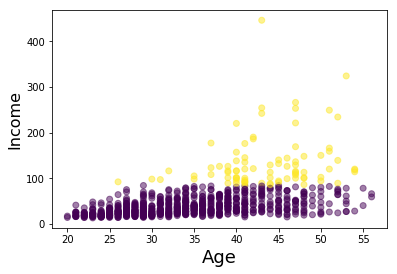

In [31]:

plt.scatter(X["Age"], X["Income"], c=k_means_labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

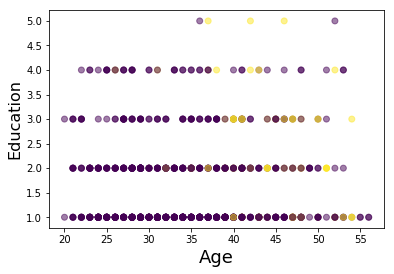

In [32]:
plt.scatter(X["Age"], X["Edu"], c=k_means_labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Education', fontsize=16)

plt.show()

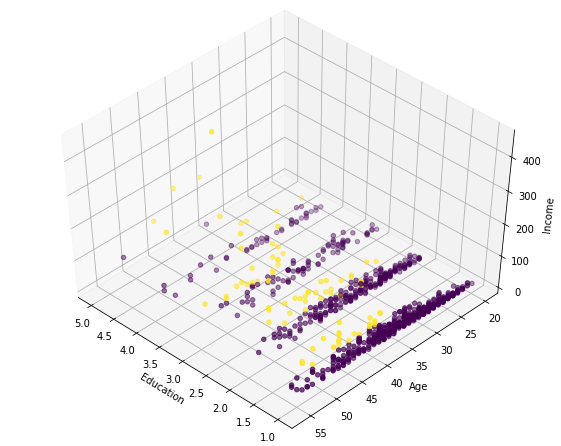

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X["Edu"], X["Age"], X["Income"], c= k_means_labels.astype(np.float))


We have 3 clusters, the customers in each cluster are similar to each other.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- MIDDLE AGED  WITH MIDDLE INCOME
- YOUNG OR MIDDLE AGED WITH LOW INCOME